# Análisis de datos exploratorio

In [102]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def dataframe_from_value_counts(dataframe, columns):
    datos = dataframe.value_counts().reset_index()
    datos.columns = columns
    return datos

## Análisis de los datos de venta

In [3]:
datos_venta = pd.read_csv(os.path.join("datos", "data_sales.csv"), sep=";")
datos_venta["date"] = pd.to_datetime(datos_venta.date, format='%Y-%m-%d')
datos_venta.head()

,item_id,date,quantity,unit_sale_price (CLP),total (CLP),client_id
0,1853,2023-12-28,1,62990.0,62990.0,3604.0
1,1003,2021-04-04,1,55990.0,55990.0,507.0
2,471,2022-01-18,1,9220.0,9220.0,4547.0
3,374,2023-04-19,1,2330.0,2330.0,1508.0
4,1847,2023-05-18,1,8990.0,8990.0,2047.0


In [4]:
missing_values = datos_venta.isnull().sum()
print(missing_values)

item_id                     0
date                        0
quantity                    0
unit_sale_price (CLP)       0
total (CLP)                 0
client_id                9938
dtype: int64


In [5]:
# Vamos a tener el tipo de cada columna, cuantos no nulos hay y memoria
datos_venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181196 entries, 0 to 181195
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                181196 non-null  int64         
 1   date                   181196 non-null  datetime64[ns]
 2   quantity               181196 non-null  int64         
 3   unit_sale_price (CLP)  181196 non-null  float64       
 4   total (CLP)            181196 non-null  float64       
 5   client_id              171258 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 8.3 MB


In [6]:
# Descripción estadística de las columnas numéricas
datos_venta.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
item_id,181196.0,1518.022451,530.992416,0.0,1408.0,1797.0,1828.0,1869.0
quantity,181196.0,1.233637,0.600804,1.0,1.0,1.0,1.0,17.0
unit_sale_price (CLP),181196.0,26041.582554,20679.510417,39.0,7990.0,20890.0,38900.0,189990.0
total (CLP),181196.0,32428.802245,34771.858126,39.0,8990.0,24990.0,44990.0,968830.0
client_id,171258.0,2566.697474,1506.370894,1.0,1248.0,2569.0,3865.0,5196.0


In [7]:
# Vendrían siendo la cantidad de items que se vendieron en una fecha dada
datos_venta.date.value_counts()

2023-11-30    1001
2022-12-31     994
2022-07-31     993
2023-05-31     991
2024-02-29     989
              ... 
2020-01-10      43
2020-01-25      41
2020-01-18      39
2020-01-06      36
2020-01-30      34
Name: date, Length: 1446, dtype: int64

<Axes: xlabel='item_id', ylabel='cantidad_vendida'>

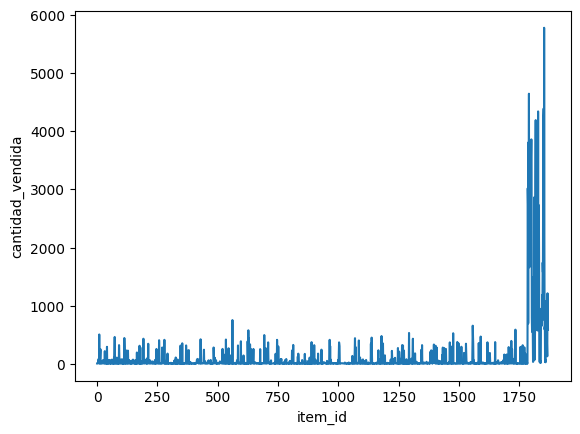

In [8]:
# La cantidad de veces que se ha vendido un ítem
ventas_item = datos_venta.item_id.value_counts()
ventas_item = ventas_item.reset_index()
ventas_item.columns = ["item_id", "cantidad_vendida"]
# print(ventas_item)

# sns.lineplot(data=ventas_item, x="item_id", y="cantidad_vendida")
sns.lineplot(data=ventas_item, x="item_id", y="cantidad_vendida")

In [9]:
# Las veces que ha comprado un determinado cliente
usuarios_compras = datos_venta.client_id.value_counts()
usuarios_compras = usuarios_compras.reset_index()
usuarios_compras.columns = ["client_id", "cantidad_compras"]

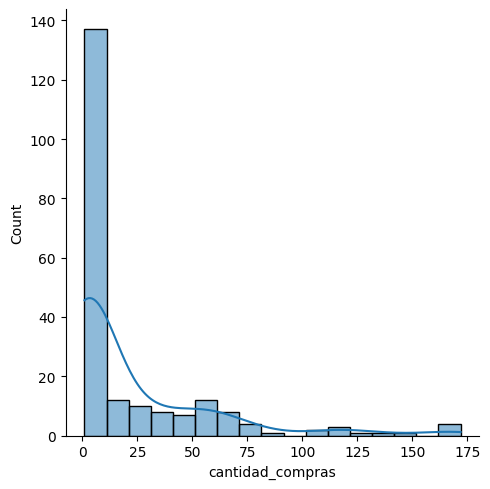

In [10]:
# sns.histplot(usuarios_compras["cantidad_compras"].value_counts())
sns.displot(usuarios_compras["cantidad_compras"].value_counts(), kde=True)

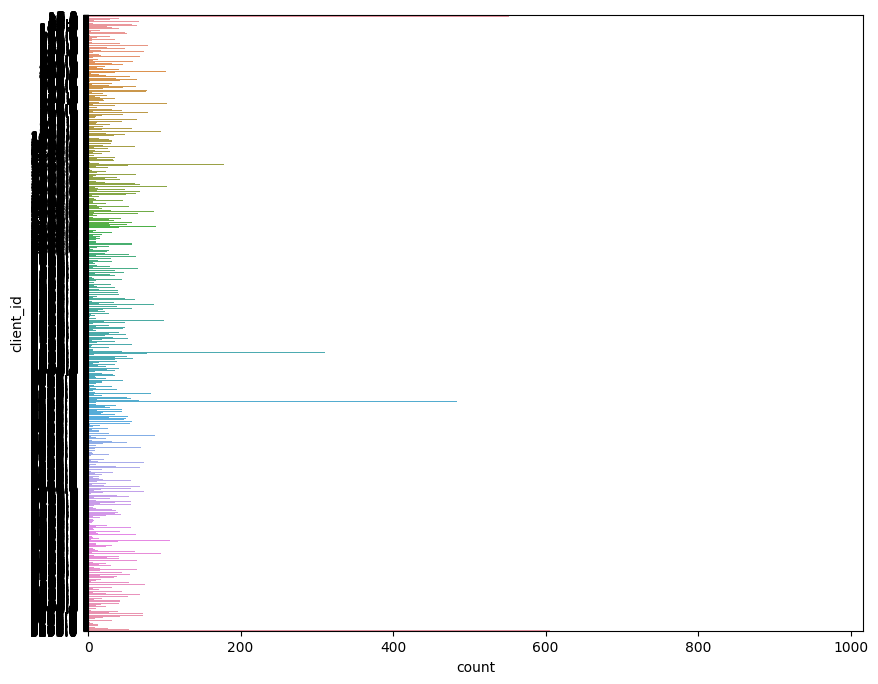

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = datos_venta.client_id.value_counts().index[:6]
sns.countplot(y="client_id", data=(datos_venta.assign(cliente=datos_venta.client_id.where(datos_venta.client_id.isin(top_n), "Otro"))))
plt.show()

<Axes: xlabel='cantidad_compras'>

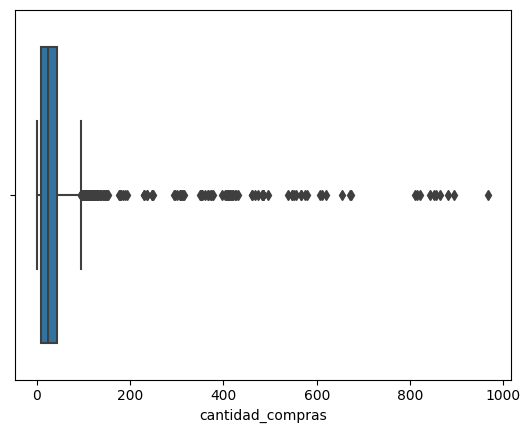

In [12]:
sns.boxplot(x=usuarios_compras["cantidad_compras"])

In [15]:
datos_venta_grupos_grandes = None

# Análisis datos inventario

In [16]:
datos_inventario = pd.read_csv(os.path.join("datos", "data_items.csv"), sep=";")
datos_inventario.head()

,item_id,description,description_2,group_description,unit_sale_price (CLP),cost (CLP),storage_cost (CLP),leadtime (days),stock,size_m3,cost_per_purchase
0,1701,meloxivet 60 ml,analgesico,medicamentos,14900.0,10347,28,9.0,2.0,0.0002,500
1,1489,le salon cortauñas alicate ergonomico,grooming,accesorios,15990.0,11666,34,9.0,0.0,0.0010,500
2,921,comedero interactivo garra marrón y azúl,juguetes,accesorios,20030.0,13145,49,10.0,0.0,0.0040,500
3,275,revolution perro 5-10 kg,ant. ext.,medicamentos,18700.0,12413,35,7.0,2.0,0.0002,500
4,416,royal canin baby cat milk 300gr,suplementos,alimento,18450.0,13913,55,6.0,1.0,0.0150,2850


In [17]:
datos_inventario["group_description"].replace("medicamento", "medicamentos", inplace=True)
datos_inventario["group_description"].replace("accesorio", "accesorios", inplace=True)

In [18]:
missing_values = datos_inventario.isnull().sum()
print(missing_values)

item_id                   0
description               0
description_2             0
group_description         0
unit_sale_price (CLP)     0
cost (CLP)                0
storage_cost (CLP)        0
leadtime (days)          85
stock                    85
size_m3                  85
cost_per_purchase         0
dtype: int64


In [19]:
datos_inventario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                1870 non-null   int64  
 1   description            1870 non-null   object 
 2   description_2          1870 non-null   object 
 3   group_description      1870 non-null   object 
 4   unit_sale_price (CLP)  1870 non-null   float64
 5   cost (CLP)             1870 non-null   int64  
 6   storage_cost (CLP)     1870 non-null   int64  
 7   leadtime (days)        1785 non-null   float64
 8   stock                  1785 non-null   float64
 9   size_m3                1785 non-null   float64
 10  cost_per_purchase      1870 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 160.8+ KB


In [20]:
datos_inventario.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
item_id,1870.0,934.500000,539.966820,0.0000,467.250,934.500,1401.750,1869.000
unit_sale_price (CLP),1870.0,19224.432187,19092.481816,1.0000,7990.000,13900.000,22990.000,189990.000
cost (CLP),1870.0,13939.151337,13956.596061,0.0000,5681.500,10155.000,16612.250,136290.000
storage_cost (CLP),1870.0,47.672193,56.777621,1.0000,17.000,29.000,55.000,758.000
leadtime (days),1785.0,8.111485,2.519299,2.0000,7.000,8.000,9.000,32.000
stock,1785.0,2.966947,12.717768,0.0000,0.000,1.000,2.000,285.000
size_m3,1785.0,0.004483,0.005667,0.0002,0.001,0.001,0.004,0.015
cost_per_purchase,1870.0,1030.764706,1102.931610,0.0000,500.000,500.000,1000.000,6050.000


In [21]:
datos_inventario.item_id.value_counts()

1701    1
1543    1
850     1
1569    1
884     1
       ..
1774    1
1315    1
86      1
694     1
1126    1
Name: item_id, Length: 1870, dtype: int64

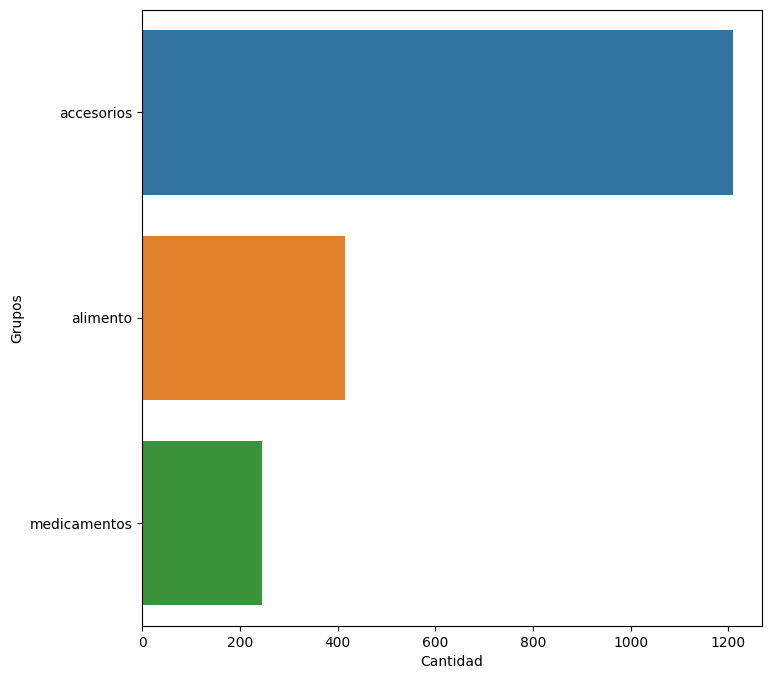

In [22]:
# Que grupos en el sentido más general tenemos
datos_inventario.group_description.value_counts()
grupos_inventario = dataframe_from_value_counts(datos_inventario.group_description, ["Grupos", "Cantidad"])
plt.figure(figsize=(8, 8))  # Ajusta el tamaño según tus preferencias
sns.barplot(grupos_inventario, y="Grupos", x="Cantidad", orient="h")
plt.show()

In [23]:
# Subclasificación de los grupos
datos_inventario.description_2.value_counts()

paseo                        586
adultos                      195
juguetes                     177
higiene                      104
ant. ext.                     88
placas identificacion         81
cachorros                     72
hogar-transporte              67
ropa                          55
enriquecimiento ambiental     43
humedo                        43
comederos                     42
grooming                      24
antibiotico                   24
latas                         22
latas medicadas               20
medicados                     20
camas                         16
comportamiento                14
senior                        13
antialergico                  13
bebederos                     12
analgesico                    12
suplementos                   11
antiparasitarios              10
razas                         10
weight control                 9
ocular                         9
digestivo                      8
snack                          8
otico     

In [24]:
# Productos
datos_inventario.description.value_counts()

palace dog house                          2
dispensador small                         2
zeecat phantom collar                     2
arnés adjustable cat                      2
cama para perro negra zeedog              2
                                         ..
eukanuba adulto small breed 6.8 kg        1
crown (my family)                         1
afp lamb cuddle country animals           1
pawise arnes y cinturon de seguridad l    1
complete grain free ferret diet 2.5kg.    1
Name: description, Length: 1807, dtype: int64

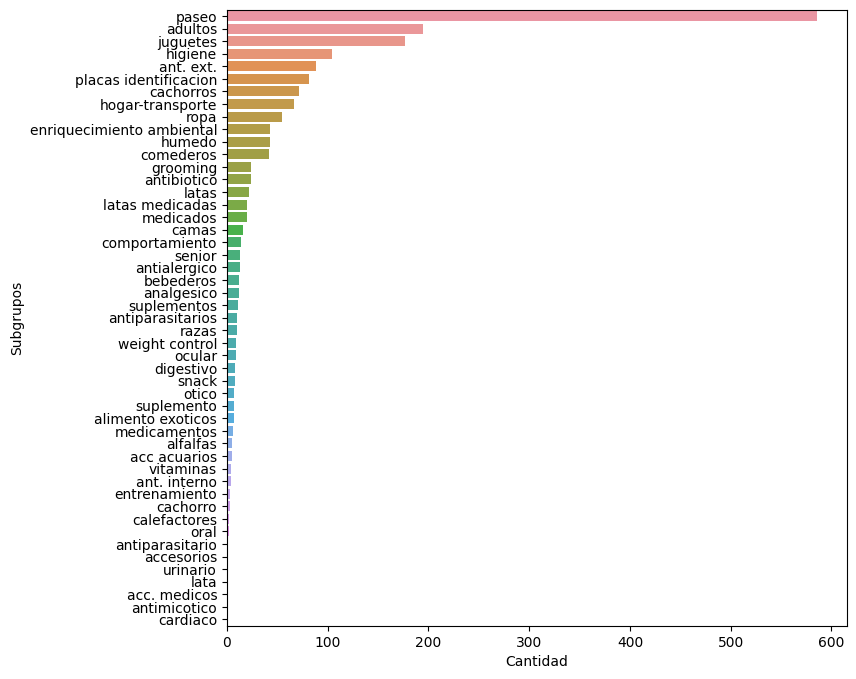

In [25]:
subgrupos_inventario = dataframe_from_value_counts(datos_inventario.description_2, ["Subgrupos", "Cantidad"])
plt.figure(figsize=(8, 8))  # Ajusta el tamaño según tus preferencias
sns.barplot(subgrupos_inventario, y="Subgrupos", x="Cantidad", orient="h")
plt.show()

In [26]:
# No tiene sentido graficar esto
datos_inventario.description.value_counts()

palace dog house                          2
dispensador small                         2
zeecat phantom collar                     2
arnés adjustable cat                      2
cama para perro negra zeedog              2
                                         ..
eukanuba adulto small breed 6.8 kg        1
crown (my family)                         1
afp lamb cuddle country animals           1
pawise arnes y cinturon de seguridad l    1
complete grain free ferret diet 2.5kg.    1
Name: description, Length: 1807, dtype: int64

# Análisis conjunto

In [27]:
datos_conjuntos = pd.merge(datos_venta, datos_inventario, on="item_id")
datos_conjuntos.head()

,item_id,date,quantity,unit_sale_price (CLP)_x,total (CLP),client_id,description,description_2,group_description,unit_sale_price (CLP)_y,cost (CLP),storage_cost (CLP),leadtime (days),stock,size_m3,cost_per_purchase
0,1853,2023-12-28,1,62990.0,62990.0,3604.0,pro plan alimento seco para adulto razas media...,adultos,alimento,62990.0,42126,190,NaN,NaN,NaN,500
1,1853,2021-08-13,1,62990.0,62990.0,3628.0,pro plan alimento seco para adulto razas media...,adultos,alimento,62990.0,42126,190,NaN,NaN,NaN,500
2,1853,2024-02-16,2,62990.0,125980.0,594.0,pro plan alimento seco para adulto razas media...,adultos,alimento,62990.0,42126,190,NaN,NaN,NaN,500
3,1853,2021-01-09,1,62990.0,62990.0,NaN,pro plan alimento seco para adulto razas media...,adultos,alimento,62990.0,42126,190,NaN,NaN,NaN,500
4,1853,2023-09-06,2,62990.0,125980.0,1522.0,pro plan alimento seco para adulto razas media...,adultos,alimento,62990.0,42126,190,NaN,NaN,NaN,500


In [28]:
datos_conjuntos.columns

Index(['item_id', 'date', 'quantity', 'unit_sale_price (CLP)_x', 'total (CLP)',
       'client_id', 'description', 'description_2', 'group_description',
       'unit_sale_price (CLP)_y', 'cost (CLP)', 'storage_cost (CLP)',
       'leadtime (days)', 'stock', 'size_m3', 'cost_per_purchase'],
      dtype='object')

In [108]:
columnas_mantener = ["date", "quantity", "description_2", "group_description", "total (CLP)", "description"]
database = datos_conjuntos[columnas_mantener]

In [109]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181196 entries, 0 to 181195
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               181196 non-null  datetime64[ns]
 1   quantity           181196 non-null  int64         
 2   description_2      181196 non-null  object        
 3   group_description  181196 non-null  object        
 4   total (CLP)        181196 non-null  float64       
 5   description        181196 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.7+ MB


In [31]:
database.head()

,date,quantity,description_2,group_description,total (CLP)
0,2023-12-28,1,adultos,alimento,62990.0
1,2021-08-13,1,adultos,alimento,62990.0
2,2024-02-16,2,adultos,alimento,125980.0
3,2021-01-09,1,adultos,alimento,62990.0
4,2023-09-06,2,adultos,alimento,125980.0


In [32]:
database["ano"] = database["date"].dt.year
database["mes"] = database["date"].dt.month

C:\Users\franc\AppData\Local\Temp\ipykernel_10832\1837948835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database["ano"] = database["date"].dt.year
C:\Users\franc\AppData\Local\Temp\ipykernel_10832\1837948835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database["mes"] = database["date"].dt.month


In [33]:
database

,date,quantity,description_2,group_description,total (CLP),ano,mes
0,2023-12-28,1,adultos,alimento,62990.0,2023,12
1,2021-08-13,1,adultos,alimento,62990.0,2021,8
2,2024-02-16,2,adultos,alimento,125980.0,2024,2
3,2021-01-09,1,adultos,alimento,62990.0,2021,1
4,2023-09-06,2,adultos,alimento,125980.0,2023,9
...,...,...,...,...,...,...,...
181191,2022-05-31,1,bebederos,accesorios,9490.0,2022,5
181192,2020-07-31,1,bebederos,accesorios,9490.0,2020,7
181193,2024-02-29,1,bebederos,accesorios,9490.0,2024,2
181194,2023-09-30,1,comederos,accesorios,14510.0,2023,9


In [34]:
database.groupby(["ano", "group_description"]).size()

ano   group_description
2020  accesorios           11518
      alimento             20613
      medicamentos          2820
2021  accesorios           12906
      alimento             25612
      medicamentos          3119
2022  accesorios           13931
      alimento             29456
      medicamentos          3348
2023  accesorios           14688
      alimento             30422
      medicamentos          3646
2024  accesorios            2783
      alimento              5659
      medicamentos           675
dtype: int64

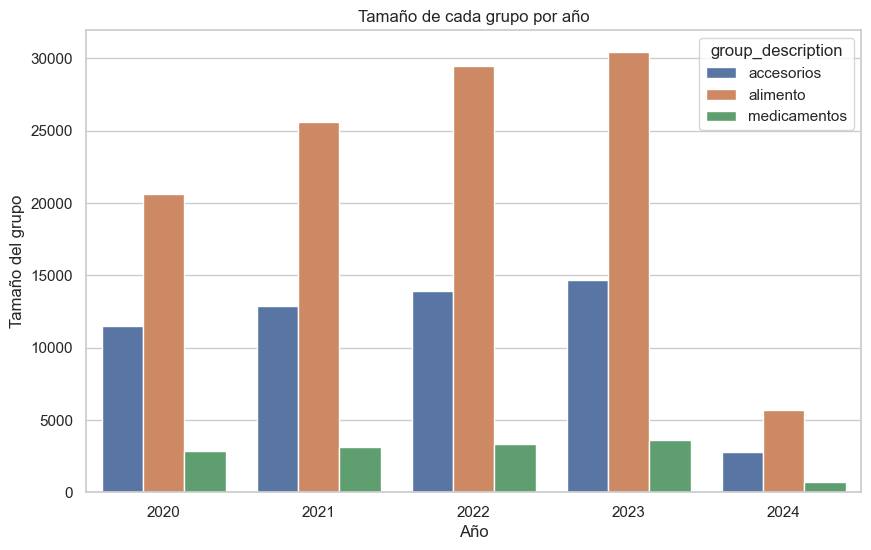

In [35]:
df_grouped = database.groupby(["ano", "group_description"]).size().reset_index(name='count')

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Utilizar sns.barplot para trazar un gráfico de barras
sns.barplot(data=df_grouped, x="ano", y="count", hue="group_description")

# Ajustar la apariencia del gráfico
plt.title('Tamaño de cada grupo por año')
plt.xlabel('Año')
plt.ylabel('Tamaño del grupo')
plt.show()

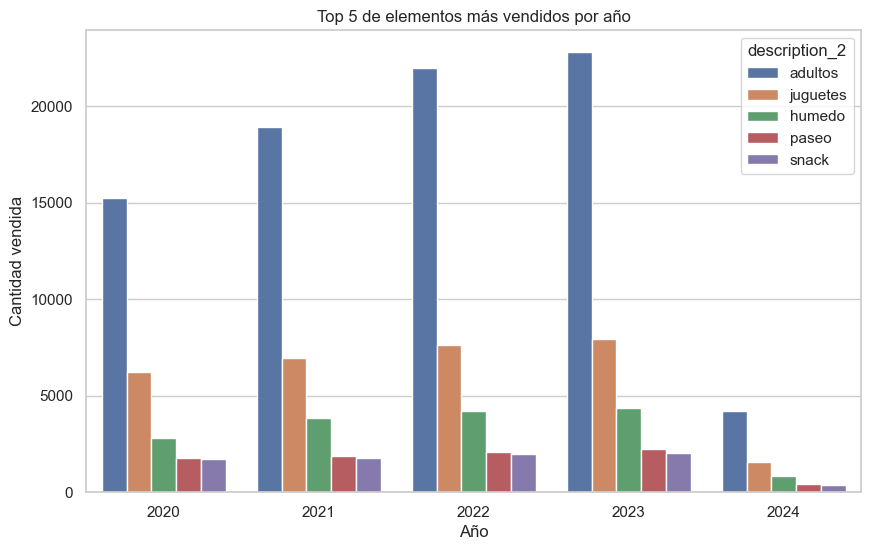

In [36]:
df_grouped = database.groupby(["ano", "description_2"]).size().reset_index(name='count')
df_grouped_sorted = df_grouped.sort_values(by=['ano', 'count'], ascending=[True, False])

# Inicializar una lista para almacenar los 5 elementos más vendidos para cada año
top_items_per_year = []

# Iterar sobre cada año y seleccionar los 5 elementos más vendidos
for year in df_grouped_sorted['ano'].unique():
    top_items_per_year.append(df_grouped_sorted[df_grouped_sorted['ano'] == year].head(5))

# Concatenar los DataFrames de los 5 elementos más vendidos para cada año
df_top_items = pd.concat(top_items_per_year)

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Utilizar sns.barplot para trazar un gráfico de barras
sns.barplot(data=df_top_items, x="ano", y="count", hue="description_2")

# Ajustar la apariencia del gráfico
plt.title('Top 5 de elementos más vendidos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad vendida')

# Mostrar el gráfico
plt.show()

In [37]:
datos_agrupados = database.groupby(["ano", "mes", "group_description"]).size()
datos_agrupados = datos_agrupados.reset_index(name='count')

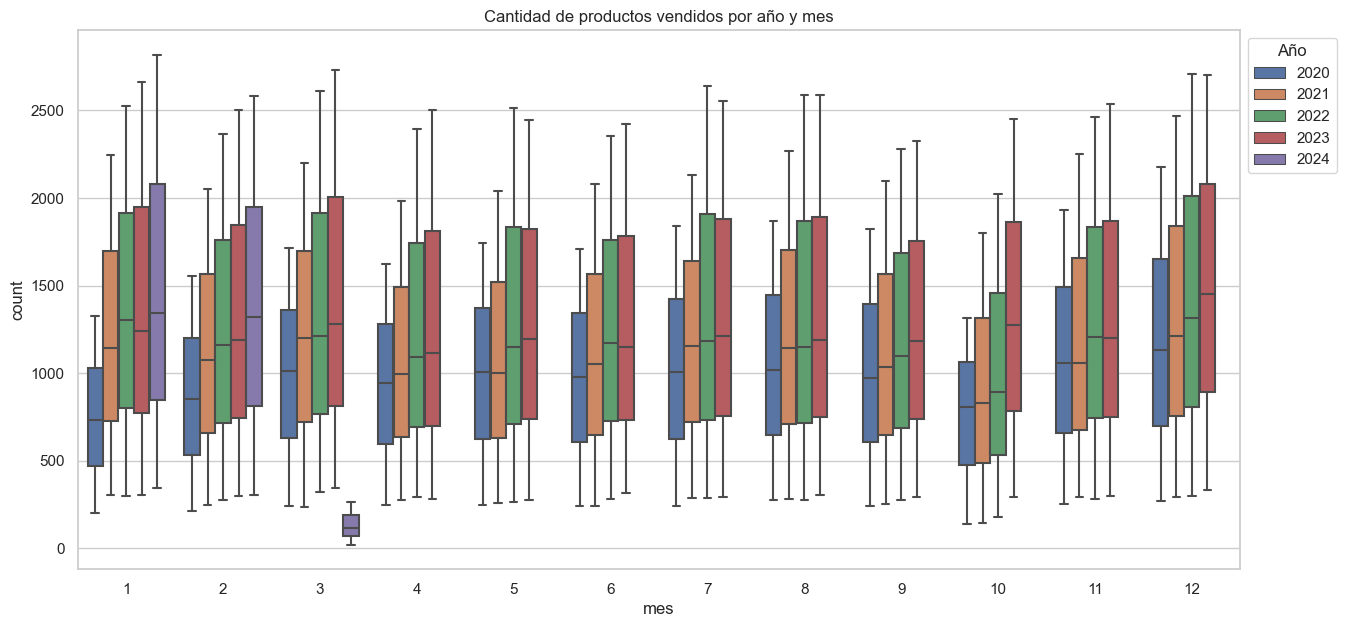

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x=datos_agrupados["mes"], y=datos_agrupados["count"], hue=datos_agrupados["ano"], ax=ax)
ax.legend(title="Año", bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Cantidad de productos vendidos por año y mes")
plt.show()

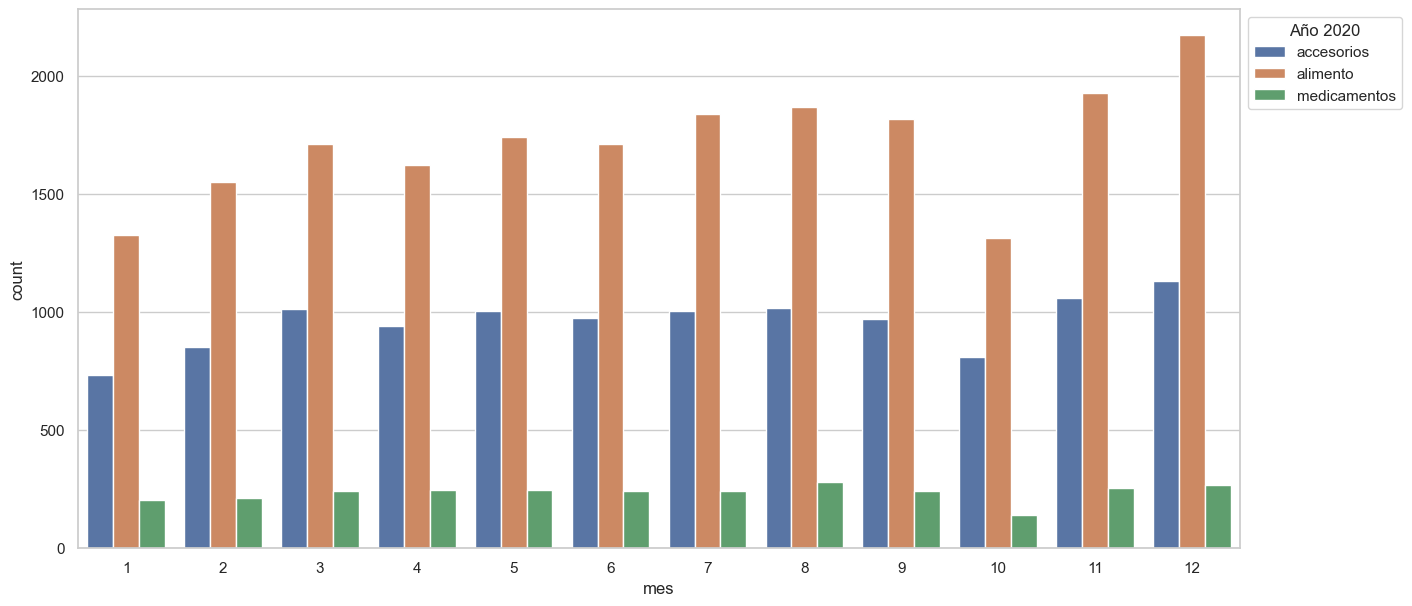

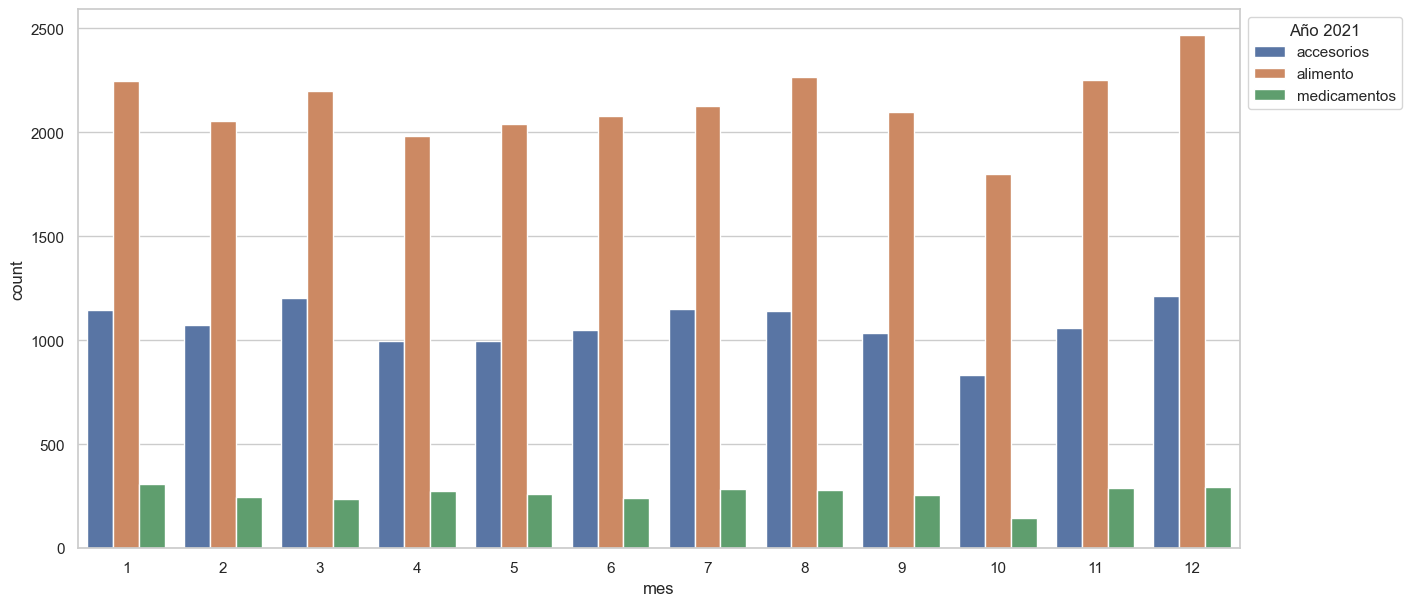

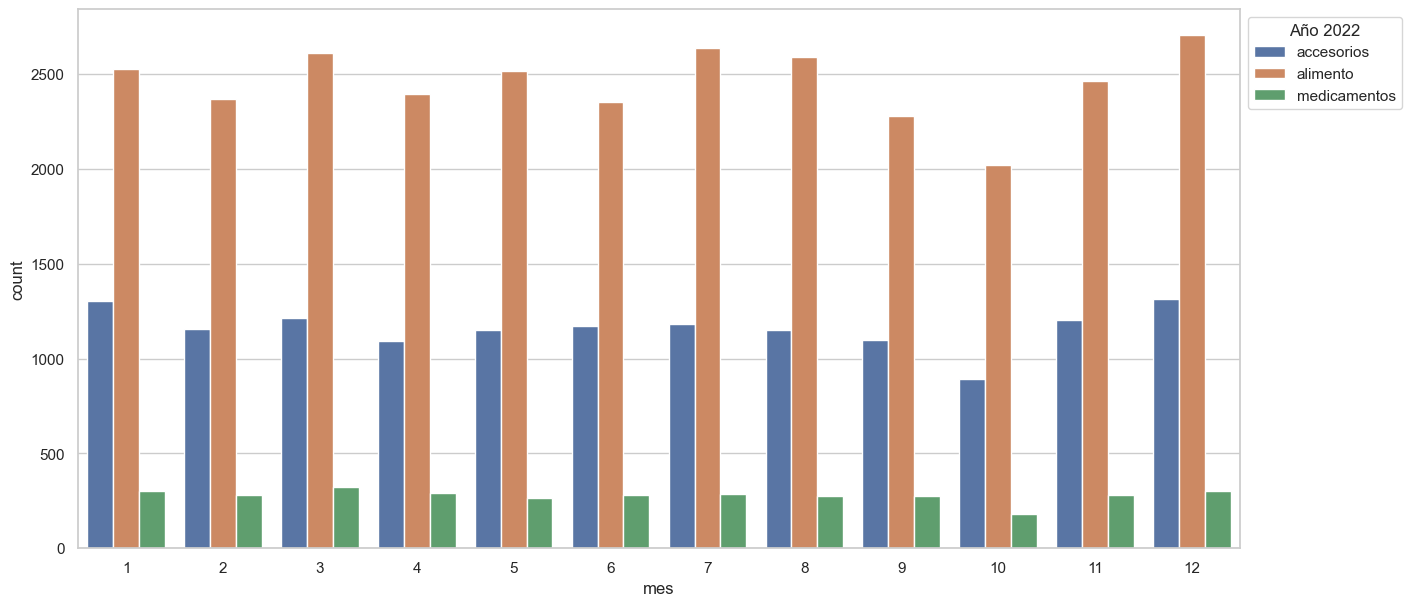

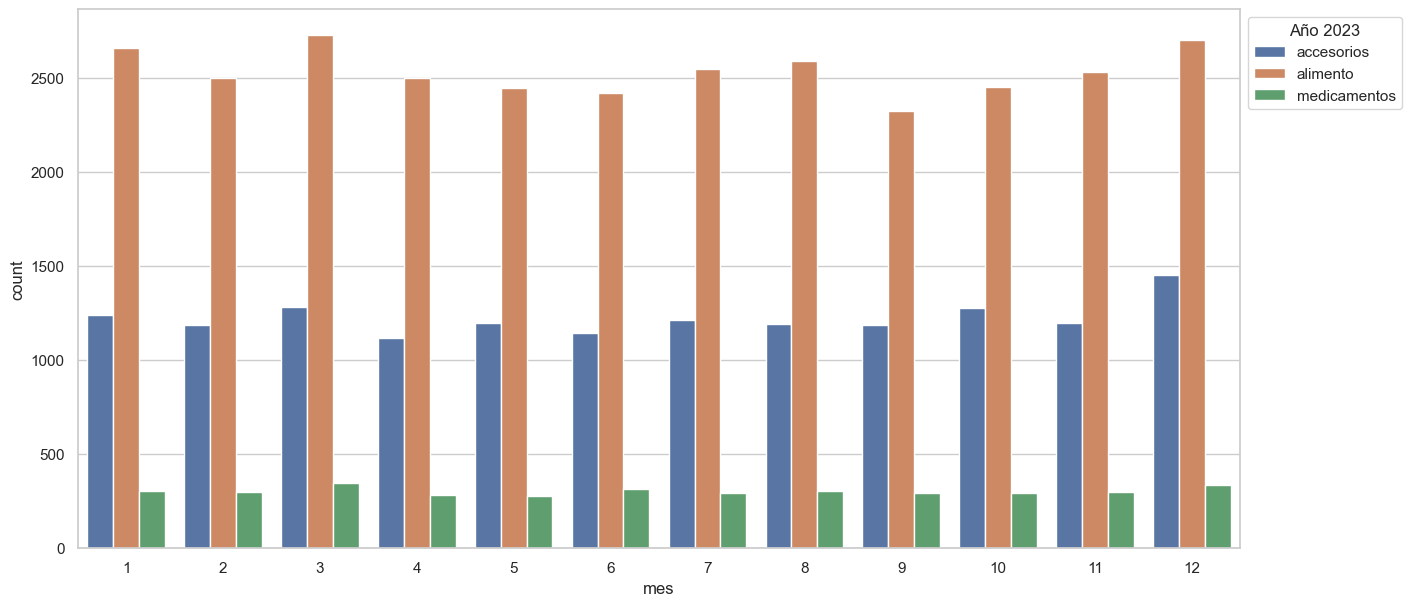

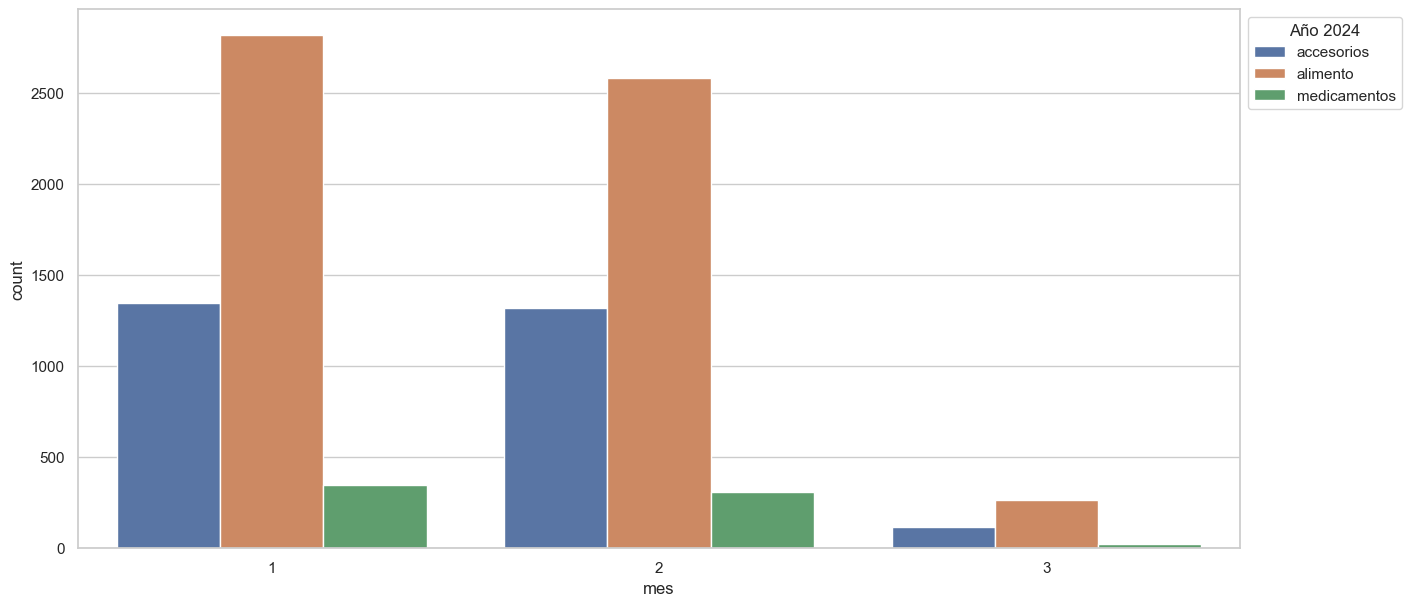

In [39]:
lista_anos = datos_agrupados["ano"].unique()
for ano in lista_anos:
    database_ano = datos_agrupados[datos_agrupados["ano"] == ano]
    fig, ax = plt.subplots(figsize=(15, 7))

    sns.barplot(x=database_ano["mes"], y=database_ano["count"], hue=database_ano["group_description"], ax=ax)
    ax.legend(title=f"Año {ano}", bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()

In [40]:
database

,date,quantity,description_2,group_description,total (CLP),ano,mes
0,2023-12-28,1,adultos,alimento,62990.0,2023,12
1,2021-08-13,1,adultos,alimento,62990.0,2021,8
2,2024-02-16,2,adultos,alimento,125980.0,2024,2
3,2021-01-09,1,adultos,alimento,62990.0,2021,1
4,2023-09-06,2,adultos,alimento,125980.0,2023,9
...,...,...,...,...,...,...,...
181191,2022-05-31,1,bebederos,accesorios,9490.0,2022,5
181192,2020-07-31,1,bebederos,accesorios,9490.0,2020,7
181193,2024-02-29,1,bebederos,accesorios,9490.0,2024,2
181194,2023-09-30,1,comederos,accesorios,14510.0,2023,9


In [41]:
datos_agrupados_mas_fino = database.groupby(["date", "group_description"]).size().reset_index(name='count')

In [42]:
datos_agrupados_mas_fino

,date,group_description,count
0,2020-01-06,accesorios,13
1,2020-01-06,alimento,19
2,2020-01-06,medicamentos,4
3,2020-01-07,accesorios,21
4,2020-01-07,alimento,27
...,...,...,...
4325,2024-03-03,alimento,73
4326,2024-03-03,medicamentos,4
4327,2024-03-04,accesorios,32
4328,2024-03-04,alimento,62


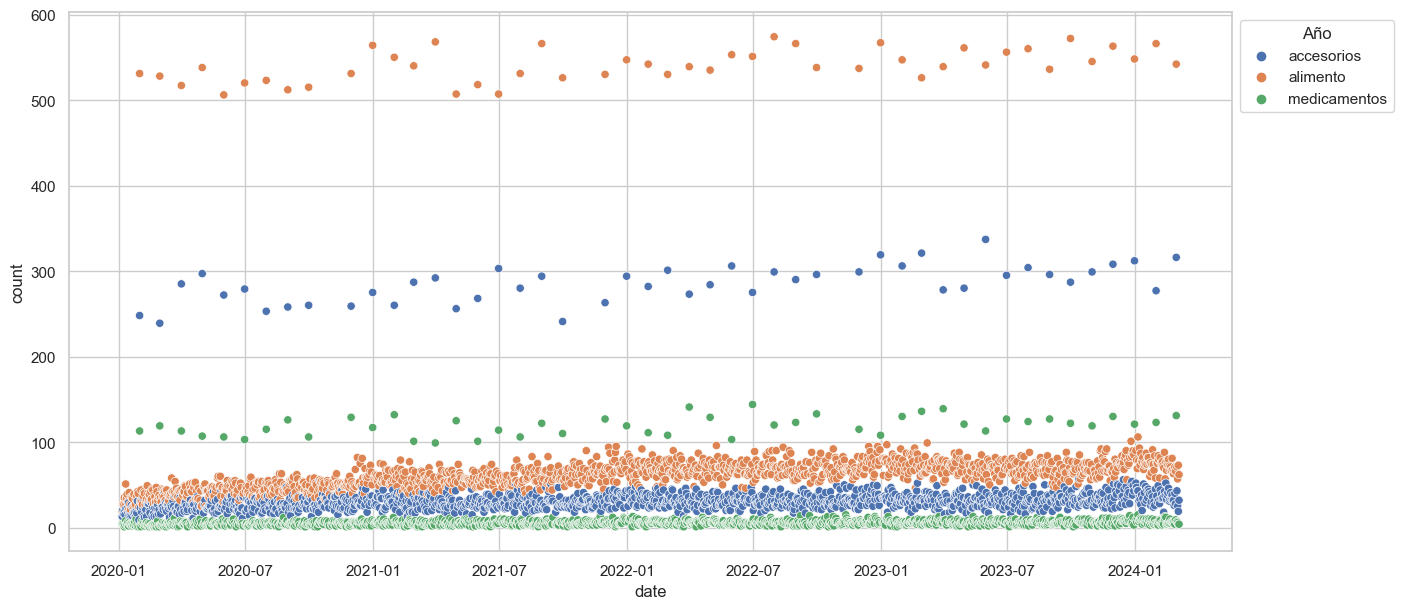

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.scatterplot(x=datos_agrupados_mas_fino["date"], y=datos_agrupados_mas_fino["count"], hue=datos_agrupados_mas_fino["group_description"], ax=ax)
ax.legend(title="Año", bbox_to_anchor=(1, 1), loc="upper left")

            date description_2  count
0     2020-01-06       adultos     16
3     2020-01-06        humedo      1
4     2020-01-06      juguetes     10
5     2020-01-06         paseo      1
7     2020-01-06         snack      1
...          ...           ...    ...
18603 2024-03-04       adultos     48
18607 2024-03-04        humedo     10
18608 2024-03-04      juguetes     19
18609 2024-03-04         paseo      3
18611 2024-03-04         snack      4

[7005 rows x 3 columns]


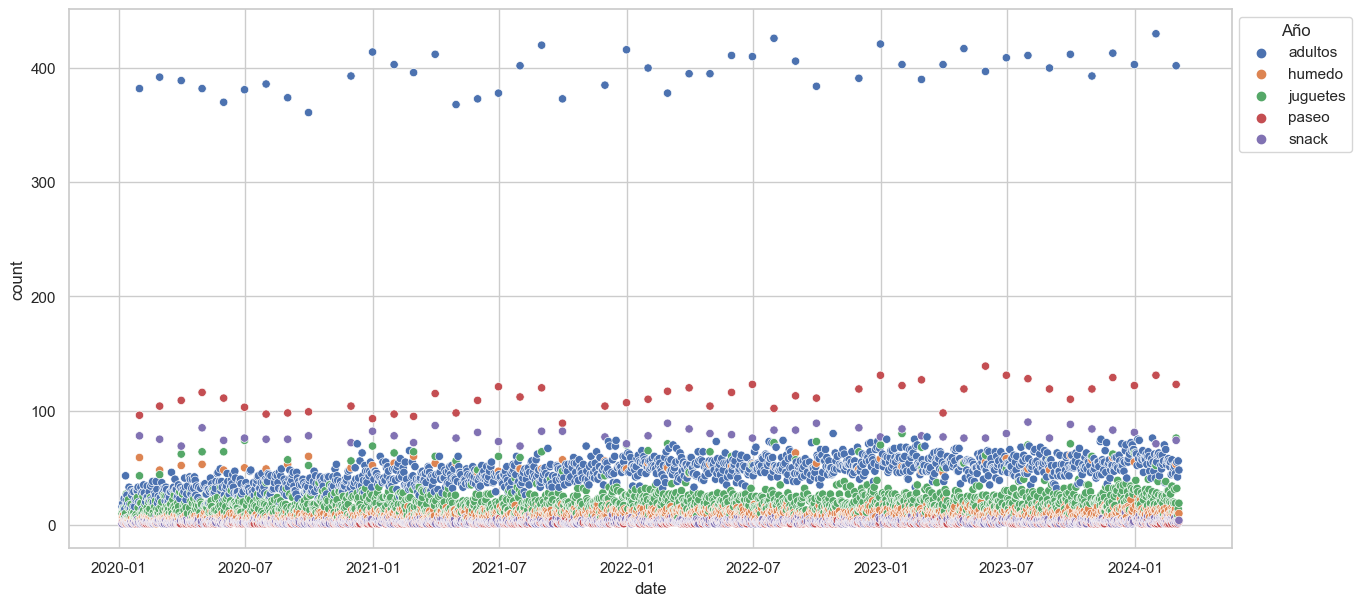

In [44]:
datos_agrupados_mas_fino_2 = database.groupby(["date", "description_2"]).size().reset_index(name='count')
datos_agrupados_mas_fino_2 = datos_agrupados_mas_fino_2[datos_agrupados_mas_fino_2["description_2"].isin(["adultos", "juguetes", "humedo", "paseo", "snack"])]
print(datos_agrupados_mas_fino_2)
fig, ax = plt.subplots(figsize=(15, 7))

sns.scatterplot(x=datos_agrupados_mas_fino_2["date"], y=datos_agrupados_mas_fino_2["count"], hue=datos_agrupados_mas_fino_2["description_2"], ax=ax)
ax.legend(title="Año", bbox_to_anchor=(1, 1), loc="upper left")

In [45]:
database["description_2"].unique()
print(len(database["description_2"].unique()))

49


# Análisis por cada uno de los días de las ventas según ciertas clasificaciones

## Análisis de las ventas de cada uno de los tres grupos grandes durante todos los períodos de tiempo

In [132]:
database_grupos_grandes_diario = database.groupby(["group_description", "date"]).size().reset_index()
database_grupos_grandes_diario.columns = ["Grupo", "Fecha", "Ventas"]

Text(0.5, 1.0, 'Ventas a través del tiempo de cada uno de los 3 grupos principales')

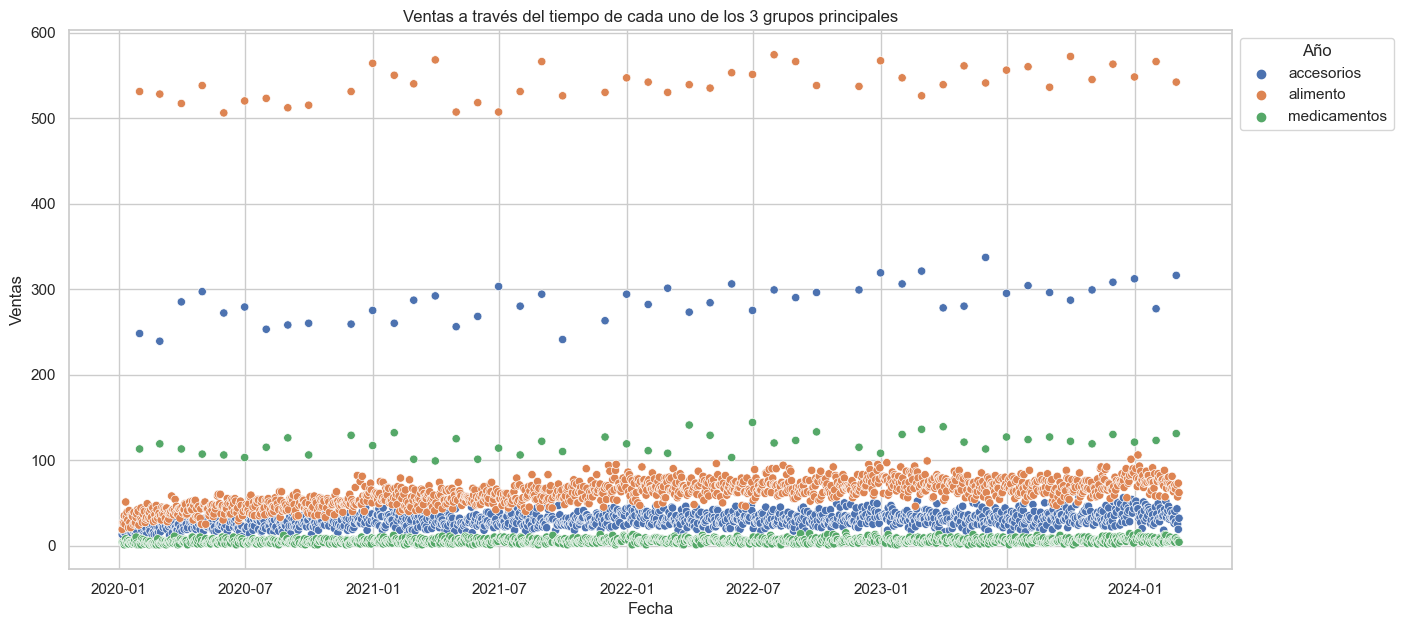

In [133]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(data=database_grupos_grandes_diario, x="Fecha", y="Ventas", hue="Grupo")
ax.legend(title="Año", bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Ventas a través del tiempo de cada uno de los 3 grupos principales")

## Análisis de las ventas de cada una de las 49 subcategorías durantes todos los períodos de tiempo

In [134]:
database_subcategorias_diario = database.groupby(["description_2", "date"]).size().reset_index()
database_subcategorias_diario.columns = ["Subcategoría", "Fecha", "Cantidad"]
database_subcategorias_diario

,Subcategoría,Fecha,Cantidad
0,acc acuarios,2020-04-30,1
1,acc acuarios,2020-07-31,2
2,acc acuarios,2020-11-30,1
3,acc acuarios,2021-01-31,3
4,acc acuarios,2021-03-31,1
...,...,...,...
18608,weight control,2024-02-10,1
18609,weight control,2024-02-14,1
18610,weight control,2024-02-18,1
18611,weight control,2024-02-22,1


In [135]:
subcategorias_unicas = database_subcategorias_diario["Subcategoría"].unique()

In [136]:
# Lo que puedo hacer es guardar los gráficos, de ahí ordenarlos según la cantidad de puntos que tenga cada uno y graficar primero los que tienen más puntos
# Ver quizás también cuando es la última vez y primera vez que se vendió cada uno de los subcategorías
graficos = list()
for subcategoria in subcategorias_unicas:
    db_loop = database_subcategorias[database_subcategorias_diario["Subcategoría"].isin([subcategoria])]
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.scatterplot(data=db_loop, x="Fecha", y="Cantidad")
    plt.title(f"Ventas a través del tiempo del subgrupo {subcategoria}")
    cantidad_puntos = len(db_loop)
    graficos.append((fig, ax, cantidad_puntos))
    plt.close()

In [137]:
graficos.sort(key = lambda x: x[2], reverse=True)

In [138]:
for indice, grafico in enumerate(graficos):
    print(f"El número de puntos del gráfico {indice} es {grafico[2]}")

El número de puntos del gráfico 0 es 1446
El número de puntos del gráfico 1 es 1446
El número de puntos del gráfico 2 es 1445
El número de puntos del gráfico 3 es 1430
El número de puntos del gráfico 4 es 1394
El número de puntos del gráfico 5 es 1378
El número de puntos del gráfico 6 es 1290
El número de puntos del gráfico 7 es 1245
El número de puntos del gráfico 8 es 1133
El número de puntos del gráfico 9 es 953
El número de puntos del gráfico 10 es 900
El número de puntos del gráfico 11 es 819
El número de puntos del gráfico 12 es 768
El número de puntos del gráfico 13 es 501
El número de puntos del gráfico 14 es 310
El número de puntos del gráfico 15 es 273
El número de puntos del gráfico 16 es 252
El número de puntos del gráfico 17 es 246
El número de puntos del gráfico 18 es 229
El número de puntos del gráfico 19 es 134
El número de puntos del gráfico 20 es 79
El número de puntos del gráfico 21 es 47
El número de puntos del gráfico 22 es 47
El número de puntos del gráfico 23 es 

In [139]:
for indice, grafico in enumerate(graficos):
    fig, ax, ptos = grafico
    path = os.path.join("plots", "subcategorias", "diario", f"Grafico_{indice}.png")
    fig.savefig(path)

## Análisis de las ventas de cada uno de los 1800 productos

In [140]:
database_productos_diario = database.groupby(["description", "date"]).size().reset_index()
database_productos_diario.columns = ["Descripción", "Fecha", "Cantidad"]

In [141]:
productos_unicos = database_productos_diario["Descripción"].unique()
productos_unicos

array([' repti resercoir ', '2 pelotas con cuerda, ø 4,5 cm',
       'acana classic prairie poultry 2 kg', ...,
       'zeus trailla dobl asa "m" rojo 1,2m',
       'zeus trailla dobl asa "xl" grafito 1,2m',
       'zeus trailla dobl asa 1,8m  l  grafito'], dtype=object)

In [142]:
graficos = list()
for producto in productos_unicos:
    db_loop = database_productos[database_productos_diario["Descripción"].isin([producto])]
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.scatterplot(data=db_loop, x="Fecha", y="Cantidad")
    plt.title(f"Ventas a través del tiempo del producto {producto}")
    cantidad_puntos = len(db_loop)
    graficos.append((fig, ax, cantidad_puntos))
    plt.close()

In [143]:
graficos.sort(key = lambda x: x[2], reverse=True)
for indice, grafico in enumerate(graficos):
    print(f"El número de puntos del gráfico {indice} es {grafico[2]}")

El número de puntos del gráfico 0 es 1295
El número de puntos del gráfico 1 es 1268
El número de puntos del gráfico 2 es 1255
El número de puntos del gráfico 3 es 1246
El número de puntos del gráfico 4 es 1243
El número de puntos del gráfico 5 es 1228
El número de puntos del gráfico 6 es 1224
El número de puntos del gráfico 7 es 1215
El número de puntos del gráfico 8 es 1201
El número de puntos del gráfico 9 es 1196
El número de puntos del gráfico 10 es 1178
El número de puntos del gráfico 11 es 1109
El número de puntos del gráfico 12 es 1104
El número de puntos del gráfico 13 es 1083
El número de puntos del gráfico 14 es 1071
El número de puntos del gráfico 15 es 1068
El número de puntos del gráfico 16 es 1065
El número de puntos del gráfico 17 es 1061
El número de puntos del gráfico 18 es 1060
El número de puntos del gráfico 19 es 1044
El número de puntos del gráfico 20 es 1041
El número de puntos del gráfico 21 es 1005
El número de puntos del gráfico 22 es 1005
El número de puntos d

In [144]:
for indice, grafico in enumerate(graficos):
    fig, ax, ptos = grafico
    path = os.path.join("plots", "productos", "diario", f"Grafico_{indice}.png")
    fig.savefig(path)

# Análisis semanal de las ventas según ciertas clasificaciones

## Análisis de las ventas de cada uno de los tres grupos grandes de manera semanal

In [162]:
copy = database.rename(columns = {"date": "fecha"})

In [163]:
copy["fecha"] = copy["fecha"] - pd.to_timedelta(7, unit="d")
database_grupos_grandes_semanal = (copy.groupby(['group_description', pd.Grouper(key='fecha', freq='W-MON')])['quantity']
    .size()
    .reset_index()
    .sort_values('fecha'))

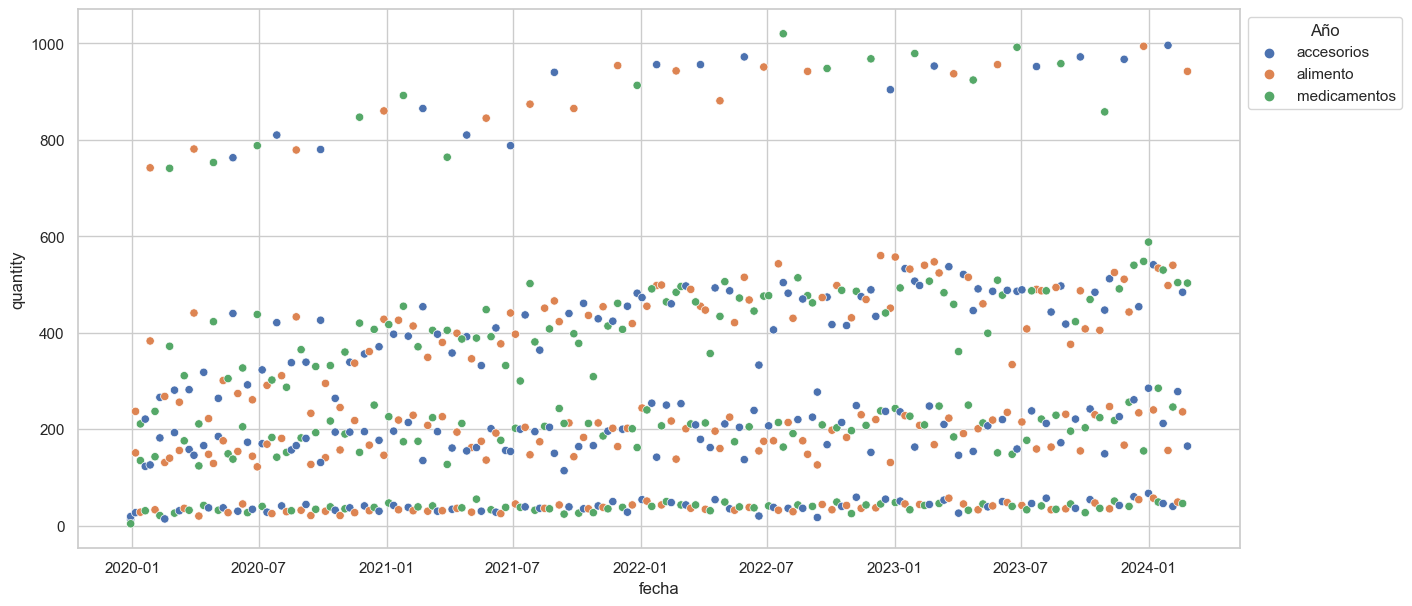

In [161]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.scatterplot(x=df["fecha"], y=df["quantity"], hue=datos_agrupados_mas_fino["group_description"], ax=ax)
ax.legend(title="Año", bbox_to_anchor=(1, 1), loc="upper left")

## Análisis de las ventas de cada una de las 49 subcategorías de manera semanal

In [167]:
database_subcategorias_semanal = (copy.groupby(['description_2', pd.Grouper(key='fecha', freq='W-MON')])['quantity']
    .size()
    .reset_index()
    .sort_values('fecha'))

In [170]:
database_subcategorias_semanal

,description_2,fecha,quantity
2542,juguetes,2019-12-30,10
38,adultos,2019-12-30,16
4179,snack,2019-12-30,1
852,cachorro,2019-12-30,1
3857,ropa,2019-12-30,2
...,...,...,...
2323,hogar-transporte,2024-02-26,19
3374,ocular,2024-02-26,5
1336,camas,2024-02-26,10
1283,cachorros,2024-02-26,3


In [173]:
subcategorias_unicas = database_subcategorias_semanal["description_2"].unique()

graficos = list()
for subcategoria in subcategorias_unicas:
    db_loop = database_subcategorias_semanal[database_subcategorias_semanal["description_2"].isin([subcategoria])]
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.scatterplot(data=db_loop, x="fecha", y="quantity")
    plt.title(f"Ventas a través del tiempo del subgrupo {subcategoria}")
    cantidad_puntos = len(db_loop)
    graficos.append((fig, ax, cantidad_puntos))
    plt.close()

In [174]:
graficos.sort(key = lambda x: x[2], reverse=True)
for indice, grafico in enumerate(graficos):
    print(f"El número de puntos del gráfico {indice} es {grafico[2]}")

El número de puntos del gráfico 0 es 218
El número de puntos del gráfico 1 es 218
El número de puntos del gráfico 2 es 218
El número de puntos del gráfico 3 es 218
El número de puntos del gráfico 4 es 218
El número de puntos del gráfico 5 es 218
El número de puntos del gráfico 6 es 218
El número de puntos del gráfico 7 es 218
El número de puntos del gráfico 8 es 217
El número de puntos del gráfico 9 es 217
El número de puntos del gráfico 10 es 217
El número de puntos del gráfico 11 es 216
El número de puntos del gráfico 12 es 215
El número de puntos del gráfico 13 es 204
El número de puntos del gráfico 14 es 170
El número de puntos del gráfico 15 es 156
El número de puntos del gráfico 16 es 155
El número de puntos del gráfico 17 es 150
El número de puntos del gráfico 18 es 144
El número de puntos del gráfico 19 es 104
El número de puntos del gráfico 20 es 65
El número de puntos del gráfico 21 es 47
El número de puntos del gráfico 22 es 47
El número de puntos del gráfico 23 es 47
El núm

In [175]:
for indice, grafico in enumerate(graficos):
    fig, ax, ptos = grafico
    path = os.path.join("plots", "subcategorias", "semanal", f"Grafico_{indice}.png")
    fig.savefig(path)